이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 어간 추출과 표제어 추출 튜토리얼입니다.  

링크 : https://wikidocs.net/21707

## **02-03 어간 추출(Stemming) and 표제어 추출(Lemmatization)**
---
  
정규화 기법 중 코퍼스에 있는 단어의 개수를 줄일 수 있는 기법인 **표제어 추출(lemmatization)** 과 **어간 추출(stemming)** 의 개념에 대해서 알아봅니다. 또한 이 둘의 결과가 어떻게 다른지 이해합니다.

이 두 작업이 갖고 있는 의미는 눈으로 봤을 때는 서로 다른 단어들이지만, 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화시켜서 문서 내의 단어 수를 줄이겠다는 것입니다. 이러한 방법들은 단어의 빈도수를 기반으로 문제를 풀고자 하는 뒤에서 학습하게 될 **BoW(Bag of Words)** 표현을 사용하는 자연어 처리 문제에서 주로 사용됩니다. 자연어 처리에서 전처리, 더 정확히는 정규화의 지향점은 언제나 갖고 있는 코퍼스로부터 복잡성을 줄이는 일입니다.

---
### **1. 표제어 추출(Lemmatization)**
---
  
표제어(Lemma)는 한글로는 '표제어' 또는 **'기본 사전형 단어'** 정도의 의미를 갖습니다. 표제어 추출은 단어들로부터 표제어를 찾아가는 과정입니다. 표제어 추출은 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단합니다. 예를 들어서 am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 볼 수 있습니다. 이때, 이 단어들의 표제어는 be라고 합니다.

표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것입니다. **형태소** 란 **'의미를 가진 가장 작은 단위'** 를 뜻합니다. 그리고 형태학(morphology)이란 형태소로부터 단어들을 만들어가는 학문을 뜻합니다. 형태소의 종류로 어간(stem)과 접사(affix)가 존재합니다.

#### **1) 어간(stem)**
: 단어의 의미를 담고 있는 단어의 핵심 부분.

#### **2) 접사(affix)**
: 단어에 추가적인 의미를 주는 부분.

형태학적 파싱은 이 두 가지 구성 요소를 분리하는 작업을 말합니다. 가령, cats라는 단어에 대해 형태학적 파싱을 수행한다면, 형태학적 파싱은 결과로 cat(어간)와 -s(접사)를 분리합니다. 꼭 두 가지로 분리되지 않는 경우도 있습니다. 단어 fox는 형태학적 파싱을 한다고 하더라도 더 이상 분리할 수 없습니다. fox는 독립적인 형태소이기 때문입니다. 이와 유사하게 cat 또한 더 이상 분리되지 않습니다.

NLTK에서는 표제어 추출을 위한 도구인 WordNetLemmatizer를 지원합니다. 이를 통해 표제어 추출을 실습해보겠습니다.

In [1]:
from nltk.stem import WordNetLemmatizer  # 표제어 추출(Stem)

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :', words)
print('표제어 추출 후 :', [lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [2]:
lemmatizer.lemmatize('lives')  # 표제어 추출

'life'

표제어 추출은 뒤에서 언급할 어간 추출과는 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징이 있습니다. 하지만 그럼에도 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있습니다. 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문입니다.

WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있습니다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력하게 됩니다.

In [3]:
lemmatizer.lemmatize('dies', 'v')  # 품사를 지정하여 표제어 추출

'die'

In [4]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [5]:
lemmatizer.lemmatize('has', 'v')

'have'

표제어 추출은 문맥을 고려하며 수행했을 때의 결과는 해당 단어의 품사 정보를 보존합니다. 하지만 어간 추출을 수행한 결과는 품사 정보가 보존되지 않습니다. 더 정확히는 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많습니다.

---
### **2. 어간 추출(Stemming)**
---
어간(Stem)을 추출하는 작업을 어간 추출(stemming)이라고 합니다. 어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있습니다. 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있습니다. 예제를 보면 쉽게 이해할 수 있습니다. 어간 추출 알고리즘 중 하나인 포터 알고리즘(Porter Algorithm)에 아래의 문자열을 입력으로 넣는다고 해봅시다.

**This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes.**

In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)
print(tokenized_sentence)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [7]:
## 어간 추출
stems = [stemmer.stem(word) for word in tokenized_sentence]
print(stems)

['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [8]:
## 표제어 추출
lemm = [lemmatizer.lemmatize(word) for word in tokenized_sentence]
print(lemm)

['This', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sounding', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


**규칙 기반의 접근** 을 하고 있으므로 어간 추출 후의 결과에는 사전에 없는 단어들도 포함되어 있습니다. 가령, 포터 알고리즘의 어간 추출은 이러한 규칙들을 가집니다.

ALIZE → AL  
ANCE → 제거  
ICAL → IC  
  
위의 규칙에 따르면 좌측의 단어는 우측의 단어와 같은 결과를 얻게됩니다.

formalize → formal  
allowance → allow  
electricical → electric  

실제 코드를 통해 확인해봅시다.

In [9]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :', words)
print('어간 추출 후 :', [stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


**※ Porter 알고리즘의 상세 규칙은 마틴 포터의 홈페이지에서 확인할 수 있다.**

어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택입니다. NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer) 알고리즘을 지원합니다. 이번에는 포터 알고리즘과 랭커스터 스태머 알고리즘으로 각각 어간 추출을 진행했을 때, 이 둘의 결과를 비교해보겠습니다.

In [10]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


동일한 단어들의 나열에 대해서 두 스태머는 전혀 다른 결과를 보여줍니다. 두 스태머 알고리즘은 서로 다른 알고리즘을 사용하기 때문입니다. 그렇기 때문에 이미 알려진 알고리즘을 사용할 때는, 사용하고자 하는 코퍼스에 스태머를 적용해보고 **어떤 스태머가 해당 코퍼스에 적합한지를 판단한 후에 사용하여야** 합니다.

이런 규칙에 기반한 알고리즘은 종종 제대로 된 일반화를 수행하지 못 할 수 있습니다. 어간 추출을 하고나서 일반화가 지나치게 되거나, 또는 덜 되거나 하는 경우입니다. 예를 들어 포터 알고리즘에서 organization을 어간 추출했을 때의 결과를 봅시다.

organization → organ

organization과 organ은 완전히 다른 단어 임에도 organization에 대해서 어간 추출을 했더니 organ이라는 단어가 나왔습니다. organ에 대해서 어간 추출을 한다고 하더라도 결과는 역시 organ이 되기 때문에, 두 단어에 대해서 어간 추출을 한다면 동일한 어간을 갖게 됩니다. 이는 의미가 동일한 경우에만 같은 단어를 얻기를 원하는 정규화의 목적에는 맞지 않습니다. 마지막으로 동일한 단어에 대해서 표제어 추출과 어간 추출을 각각 수행했을 때, 결과에서 어떤 차이가 있는지 간단한 예를 보겠습니다.  
  
**Stemming**  
am → am  
the going → the go  
having → hav  
  
**Lemmatization**  
am → be  
the going → the going  
having → have  


---
### **3. 한국어에서의 어간 추출**
---  

한국어의 어간에 대해서 간략히 설명합니다. 한국어는 아래의 표와 같이 5언 9품사의 구조를 가지고 있습니다.

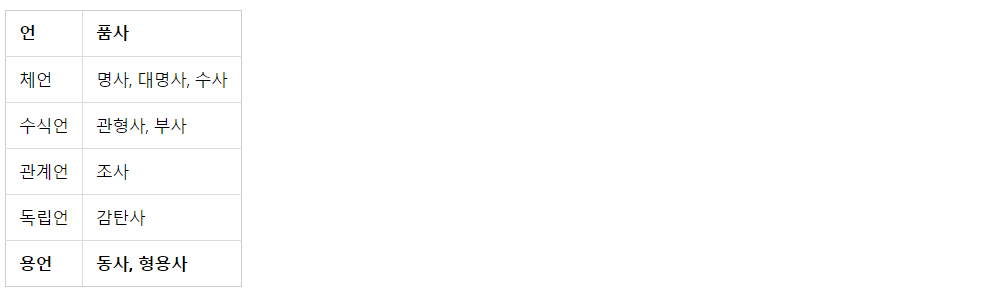

이 중 용언에 해당되는 '동사'와 '형용사'는 어간(stem)과 어미(ending)의 결합으로 구성됩니다. 앞으로 용언이라고 언급하는 부분은 전부 동사와 형용사를 포함하여 언급하는 개념입니다.

#### **(1) 활용(conjugation)**
활용(conjugation)은 한국어에서만 가지는 특징이 아니라, 인도유럽어(indo-european language)에서도 주로 볼 수 있는 언어적 특징 중 하나를 말하는 통칭적인 개념입니다. 다만, 여기서는 한국어에 한정하여 설명합니다.

활용이란 용언의 어간(stem)이 어미(ending)를 가지는 일을 말합니다.

**어간(stem)** : 용언(동사, 형용사)을 활용할 때, **원칙적으로 모양이 변하지 않는 부분** . 활용에서 어미에 선행하는 부분. 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).

**어미(ending)**: 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행

활용은 어간이 어미를 취할 때, 어간의 모습이 일정하다면 규칙 활용, 어간이나 어미의 모습이 변하는 불규칙 활용으로 나뉩니다.

#### **(2) 규칙 활용**
규칙 활용은 어간이 어미를 취할 때, 어간의 모습이 일정합니다. 아래의 예제는 어간과 어미가 합쳐질 때, 어간의 형태가 바뀌지 않음을 보여줍니다.
```
잡/어간 + 다/어미
```
이 경우에는 어간이 어미가 붙기전의 모습과 어미가 붙은 후의 모습이 같으므로, 규칙 기반으로 어미를 단순히 분리해주면 어간 추출이 됩니다.

#### **(3) 불규칙 활용**
불규칙 활용은 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우를 말합니다.

예를 들어 ‘듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ 등이 ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-’와 같이 어간의 형식이 달라지는 일이 있거나 ‘오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러’와 같이 일반적인 어미가 아닌 특수한 어미를 취하는 경우 불규칙활용을 하는 예에 속합니다.

이 경우에는 어간이 어미가 붙는 과정에서 어간의 모습이 바뀌었으므로 단순한 분리만으로 어간 추출이 되지 않고 좀 더 복잡한 규칙을 필요로 합니다. 아래의 링크는 다양한 불규칙 활용의 예를 보여줍니다.
  
링크 : https://namu.wiki/w/한국어/불규칙%20활용

마지막 편집일시 : 2022년 11월 14일 2:42 오후